In [1]:
# Load Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


#Set Working Directory
os.chdir(r"/Users/glinn/Documents/CSCI5622-machine-learning/project/csci5622project")

In [2]:
def TurnDfXIntoArray(df):
    df=df.drop(columns=["Unnamed: 0"])
    array = np.array(df)
    return array
def TurnDfYIntoVector(df):
    array = np.array(df,dtype=int)
    return array
def TuneParameters(Model,C,X_train,Y_train,X_valid,Y_valid):
    accuracy = []
    accuracy_train = []
    best_accuracy = 0.0
    for i in range(len(C)):
        Model.set_params(C=C[i])
        Model.fit(X_train,Y_train)
        yhat = Model.predict(X_valid)
        accuracy.append(accuracy_score(Y_valid,yhat))
        yhat_train = Model.predict(X_train)
        accuracy_train.append(accuracy_score(Y_train,yhat_train))
        if accuracy[i]>best_accuracy:
            best_accuracy = accuracy[i]
            Coef = Model.coef_
    accuracy = np.array(accuracy)
    accuracy_train = np.array(accuracy_train)
    return accuracy, accuracy_train, Coef
def OneHotEncodeCategory(df,CategoryHeader):
    df = pd.get_dummies(df,columns = CategoryHeader)
    array = TurnDfXIntoArray(df)
    return array

def PlotBiasVariance(accuracy_train,accuracy_valid,C):
    plt.plot(C,1-accuracy_train,'b')
    plt.plot(C,1-accuracy_valid,'r')
    plt.title("Error vs. Complexity (Regularization parameter, C)")
    plt.xlabel("Model Complexity ~ C")
    plt.ylabel("1-accuracy")
    plt.legend(["Training 1-Accuracy","Validation 1-Accuracy"])

def ReportBest(accuracy_train,accuracy_valid,C,Coef):
    print(f"The best validation accuracy is {np.amax(accuracy_valid)}.")
    print(f"The best training accuracy is {np.amax(accuracy_train)}.")
    print(f"The best value for C is {C[np.argmax(accuracy_valid)]}")
    print(f"And, the best model coefficients are {Coef}.")

def ReportFull(accuracy_train,accuracy_valid,C,Coef):
    print(f"The validation accuracy is {accuracy_valid}.")
    print(f"The training accuracy is {accuracy_train}.")
    print(f"The best value for C is {C[np.argmax(accuracy_valid)]}")
    print(f"And, the best model coefficients are {Coef}.")

Import the Data

In [3]:
#training data
X_train_df = pd.read_csv(r"data/preprocess-base-x-train.csv")
Y_train_df = pd.read_csv(r"data/preprocess-base-y-train.csv")
#validation data
X_valid_df = pd.read_csv(r"data/preprocess-base-x-valid.csv")
Y_valid_df = pd.read_csv(r"data/preprocess-base-y-valid.csv")

X_train = TurnDfXIntoArray(X_train_df)
X_valid = TurnDfXIntoArray(X_valid_df)
Y_train = TurnDfYIntoVector(Y_train_df)
Y_valid = TurnDfYIntoVector(Y_valid_df)

print(X_train_df.head(5))

   Unnamed: 0  main_category  category  duration  usd_goal_real  \
0           0             12        19 -0.316333      -0.036515   
1           2              8       136  2.025723      -0.031740   
2           4              7        44 -0.272265      -0.032463   
3           5              5        31 -0.400095      -0.034948   
4           6              6        93 -0.326225       0.008140   

   launched_month  deadline_month  
0             4.0             5.0  
1            10.0             0.0  
2             7.0             8.0  
3             2.0             3.0  
4             0.0             2.0  


Choose a random seed for repeatability

In [4]:
np.random.seed(6591)

# Build the Model

In [5]:
# Define pipeline
pipeline_LogReg = LogisticRegression(penalty='l1',n_jobs=-1,max_iter=200)

# Test the Model

In [6]:
C=[0.01,1.0,10.0,100.0,1000.0]
Accuracy, Accuracy_train, Coef = TuneParameters(pipeline_LogReg,C,X_train,Y_train,X_valid,Y_valid)
ReportFull(Accuracy_train,Accuracy,C,Coef)

/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sk

The validation accuracy is [0.61192818 0.61385305 0.61382297 0.61376282 0.61370267].
The training accuracy is [0.60787099 0.60986734 0.60990334 0.60991535 0.60990334].
The best value for C is 1.0
And, the best model coefficients are [[-1.35944239e-02  2.15847832e-03 -2.01575233e-01 -1.78757020e+01
  -9.42695647e-03  5.90951536e-03]].


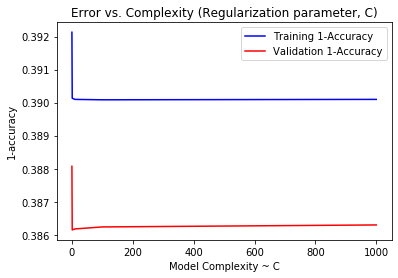

In [7]:
PlotBiasVariance(Accuracy_train,Accuracy,C)
plt.savefig('Figures/LogReg/BaseDataset/BiasVarianceCoarseTunedC.png')

In [8]:
C_fine=np.linspace(0.1,2.0,10)
Accuracy_fine, Accuracy_train_fine, Coef_fine = TuneParameters(pipeline_LogReg,C_fine,X_train,Y_train,X_valid,Y_valid)
ReportBest(Accuracy_train_fine,Accuracy_fine,C_fine,Coef_fine)

/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sk

The best validation accuracy is 0.6138530482119763.
The best training accuracy is 0.609899342284242.
The best value for C is 0.9444444444444444
And, the best model coefficients are [[-1.37102309e-02  2.15368390e-03 -2.01591361e-01 -1.78486198e+01
  -9.41660565e-03  5.78876429e-03]].


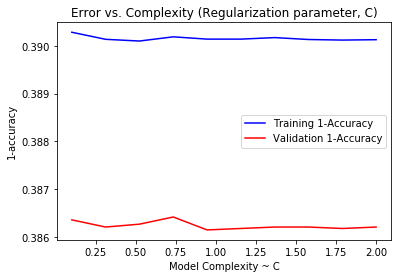

In [9]:
PlotBiasVariance(Accuracy_train_fine,Accuracy_fine,C_fine)
plt.savefig('Figures/LogReg/BaseDataset/BiasVarianceFineTunedC.png')

Okay, so in the end, our best result after tuning the complexity of our model is:

In [10]:
ReportBest(Accuracy_train_fine,Accuracy_fine,C_fine,Coef_fine)

The best validation accuracy is 0.6138530482119763.
The best training accuracy is 0.609899342284242.
The best value for C is 0.9444444444444444
And, the best model coefficients are [[-1.37102309e-02  2.15368390e-03 -2.01591361e-01 -1.78486198e+01
  -9.41660565e-03  5.78876429e-03]].


# Okay, and what if we one hot encode the categories?

In [11]:
# Just one hot the main category first
X_train_OneHot_Main = OneHotEncodeCategory(X_train_df,["main_category"])
X_valid_OneHot_Main = OneHotEncodeCategory(X_valid_df,["main_category"])

#Now just the sub category
X_train_OneHot_Sub = OneHotEncodeCategory(X_train_df,["category"])
X_valid_OneHot_Sub = OneHotEncodeCategory(X_valid_df,["category"])

# One hot both categories
X_train_OneHot_Both = OneHotEncodeCategory(X_train_df,["main_category","category"])
X_valid_OneHot_Both = OneHotEncodeCategory(X_valid_df,["main_category","category"])

First, Let's just look at one hot encoding the main category.

In [12]:
C_Main=[0.01,1.0,10.0,100.0,1000.0]
Accuracy_Main,Accuracy_train_Main,Coef_Main = TuneParameters(pipeline_LogReg,C_Main,X_train_OneHot_Main,Y_train,X_valid_OneHot_Main,Y_valid)
ReportFull(Accuracy_train_Main,Accuracy_Main,C_Main,Coef_Main)

/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sk

The validation accuracy is [0.63989894 0.6441096  0.64395922 0.64395922 0.64395922].
The training accuracy is [0.64162893 0.64551761 0.6454656  0.64549361 0.64549761].
The best value for C is 1.0
And, the best model coefficients are [[ 5.02128242e-04 -2.25731242e-01 -1.55673692e+01 -7.43853401e-03
   6.87546823e-03 -1.37474595e-01  4.66951253e-01 -1.00825786e+00
   7.15609268e-01 -8.13722006e-02 -8.17873141e-01 -1.01859475e-01
  -7.31874859e-01 -7.52778584e-02 -1.02343805e+00  2.24409798e-01
  -6.01095660e-01 -5.26005857e-01 -7.51917660e-01  6.63975183e-01]].


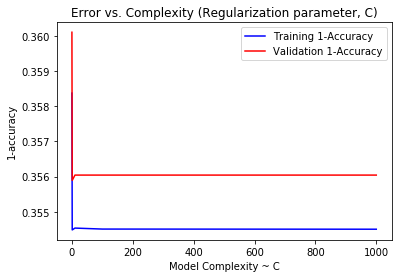

In [13]:
PlotBiasVariance(Accuracy_train_Main,Accuracy_Main,C_Main)
plt.savefig('Figures/LogReg/BaseDataset/BiasVarianceOneHotMainCoarseTunedC.png')

In [14]:
C_Main_fine=np.linspace(0.1,2.0,10)
Accuracy_Main_fine,Accuracy_train_Main_fine,Coef_Main_fine = TuneParameters(pipeline_LogReg,C_Main_fine,X_train_OneHot_Main,Y_train,X_valid_OneHot_Main,Y_valid)
ReportBest(Accuracy_train_Main_fine,Accuracy_Main_fine,C_Main_fine,Coef_Main_fine)

/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sk

The best validation accuracy is 0.6440795211886072.
The best training accuracy is 0.6455296132119253.
The best value for C is 0.7333333333333333
And, the best model coefficients are [[ 4.98798382e-04 -2.25771868e-01 -1.55361868e+01 -7.45225145e-03
   6.85249301e-03 -3.70155039e-01  2.34000099e-01 -1.24050119e+00
   4.82175628e-01 -3.14217656e-01 -1.05065328e+00 -3.34633715e-01
  -9.64710578e-01 -3.07782278e-01 -1.25533436e+00 -7.93919125e-03
  -8.33369474e-01 -7.58543068e-01 -9.84878327e-01  4.31226860e-01]].


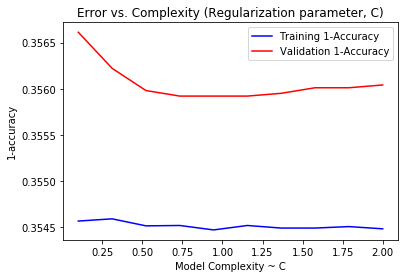

In [15]:
PlotBiasVariance(Accuracy_train_Main_fine,Accuracy_Main_fine,C_Main_fine)
plt.savefig('Figures/LogReg/BaseDataset/BiasVarianceOneHotMainFineTunedC.png')

Okay, so in the end, our best result after tuning the complexity of our model is:

In [16]:
ReportBest(Accuracy_train_Main_fine,Accuracy_Main_fine,C_Main_fine,Coef_Main_fine)

The best validation accuracy is 0.6440795211886072.
The best training accuracy is 0.6455296132119253.
The best value for C is 0.7333333333333333
And, the best model coefficients are [[ 4.98798382e-04 -2.25771868e-01 -1.55361868e+01 -7.45225145e-03
   6.85249301e-03 -3.70155039e-01  2.34000099e-01 -1.24050119e+00
   4.82175628e-01 -3.14217656e-01 -1.05065328e+00 -3.34633715e-01
  -9.64710578e-01 -3.07782278e-01 -1.25533436e+00 -7.93919125e-03
  -8.33369474e-01 -7.58543068e-01 -9.84878327e-01  4.31226860e-01]].


Second, we look at what happens if we just one hot the sub-categories.

In [17]:
C_Sub=[0.01,1.0,10.0,100.0,1000.0]
Accuracy_Sub,Accuracy_train_Sub,Coef_Sub = TuneParameters(pipeline_LogReg,C_Sub,X_train_OneHot_Sub,Y_train,X_valid_OneHot_Sub,Y_valid)
ReportFull(Accuracy_train_Sub,Accuracy_Sub,C_Sub,Coef_Sub)

/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sk

The validation accuracy is [0.65484676 0.66194472 0.66194472 0.66191464 0.66194472].
The training accuracy is [0.66058826 0.66832963 0.66833363 0.66826161 0.66827362].
The best value for C is 1.0
And, the best model coefficients are [[ 1.39596771e-02 -2.25817224e-01 -1.52028879e+01 -7.59079446e-03
   5.95268379e-03  3.49143650e-01 -7.08523808e-01 -3.18785356e-02
  -7.27403579e-01 -7.68902179e-01 -1.79794439e-01  1.16870289e+00
  -7.91798662e-01 -1.93305523e+00 -2.43261239e-01  2.89750261e-01
   6.13403132e-01 -3.79747512e-01 -9.09232807e-01  3.40986432e-01
  -8.02573306e-03  7.37182428e-01 -1.28893270e+00  3.01567253e-01
  -1.69325944e-01 -7.89576764e-01  1.74518973e+00  1.22904767e-01
   1.12746506e+00  2.54495721e-01  1.01344154e+00  7.01622123e-01
  -7.00029289e-01 -1.11614842e-02 -5.03459958e-01  1.03793308e+00
  -9.87761741e-01 -5.81219771e-01 -6.28487755e-01 -1.18924078e+00
   4.79516349e-01  1.30221875e+00  1.83162484e-01 -3.86902265e-01
   2.48731002e-01  2.21036459e-01 -3.9486

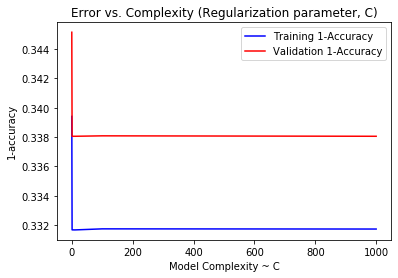

In [18]:
PlotBiasVariance(Accuracy_train_Sub,Accuracy_Sub,C_Sub)
plt.savefig('Figures/LogReg/BaseDataset/BiasVarianceOneHotSubCoarseTunedC.png')

In [19]:
C_Sub_fine=np.linspace(0.1,2.0,10)
Accuracy_Sub_fine,Accuracy_train_Sub_fine,Coef_Sub_fine = TuneParameters(pipeline_LogReg,C_Sub_fine,X_train_OneHot_Sub,Y_train,X_valid_OneHot_Sub,Y_valid)
ReportBest(Accuracy_train_Sub_fine,Accuracy_Sub_fine,C_Sub_fine,Coef_Sub_fine)

/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sk

The best validation accuracy is 0.6620349484195014.
The best training accuracy is 0.6683896365760373.
The best value for C is 0.5222222222222223
And, the best model coefficients are [[ 1.50134668e-02 -2.25729064e-01 -1.51313162e+01 -7.61020497e-03
   5.95505711e-03  3.45315811e-01 -6.92603473e-01 -1.46140758e-02
  -7.00402985e-01 -7.32491155e-01 -1.63221635e-01  1.17462630e+00
  -7.75377721e-01 -1.92340905e+00 -2.16700541e-01  3.09906734e-01
   6.19102163e-01 -3.52500645e-01 -8.55531247e-01  3.29432540e-01
   0.00000000e+00  7.28356568e-01 -1.24706273e+00  3.03506384e-01
  -1.60498069e-01 -7.57758636e-01  1.53520418e+00  1.17193537e-01
   1.13536382e+00  2.65678226e-01  1.03092994e+00  7.20172808e-01
  -6.60334755e-01  0.00000000e+00 -4.76968432e-01  1.04670701e+00
  -9.35156517e-01 -5.61049151e-01 -5.71208522e-01 -1.16188097e+00
   4.79746962e-01  1.31708385e+00  1.97788348e-01 -3.61026139e-01
   2.62033211e-01  2.32301820e-01 -3.79229027e-01 -1.92194884e-01
  -1.04809262e+00 -8.23240

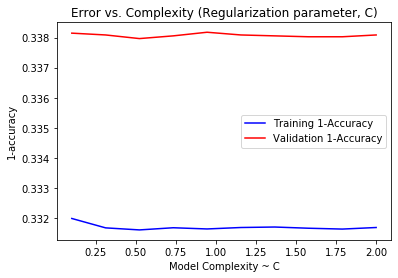

In [20]:
PlotBiasVariance(Accuracy_train_Sub_fine,Accuracy_Sub_fine,C_Sub_fine)
plt.savefig('Figures/LogReg/BaseDataset/BiasVarianceOneHotSubFineTunedC.png')

Okay, so in the end, our best result after tuning the complexity of our model is:

In [21]:
ReportBest(Accuracy_train_Sub_fine,Accuracy_Sub_fine,C_Sub_fine,Coef_Sub_fine)

The best validation accuracy is 0.6620349484195014.
The best training accuracy is 0.6683896365760373.
The best value for C is 0.5222222222222223
And, the best model coefficients are [[ 1.50134668e-02 -2.25729064e-01 -1.51313162e+01 -7.61020497e-03
   5.95505711e-03  3.45315811e-01 -6.92603473e-01 -1.46140758e-02
  -7.00402985e-01 -7.32491155e-01 -1.63221635e-01  1.17462630e+00
  -7.75377721e-01 -1.92340905e+00 -2.16700541e-01  3.09906734e-01
   6.19102163e-01 -3.52500645e-01 -8.55531247e-01  3.29432540e-01
   0.00000000e+00  7.28356568e-01 -1.24706273e+00  3.03506384e-01
  -1.60498069e-01 -7.57758636e-01  1.53520418e+00  1.17193537e-01
   1.13536382e+00  2.65678226e-01  1.03092994e+00  7.20172808e-01
  -6.60334755e-01  0.00000000e+00 -4.76968432e-01  1.04670701e+00
  -9.35156517e-01 -5.61049151e-01 -5.71208522e-01 -1.16188097e+00
   4.79746962e-01  1.31708385e+00  1.97788348e-01 -3.61026139e-01
   2.62033211e-01  2.32301820e-01 -3.79229027e-01 -1.92194884e-01
  -1.04809262e+00 -8.23240

Now, let's try one hot encoding both: 

In [22]:
C_Both=[0.01,1.0,10.0,100.0,1000.0,2000.0]
Accuracy_Both,Accuracy_train_Both,Coef_Both = TuneParameters(pipeline_LogReg,C_Both,X_train_OneHot_Both,Y_train,X_valid_OneHot_Both,Y_valid)
ReportFull(Accuracy_train_Both,Accuracy_Both,C_Both,Coef_Both)

/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sk

The validation accuracy is [0.6571927  0.6620951  0.66224548 0.66224548 0.66230563 0.66233571].
The training accuracy is [0.66296868 0.66866569 0.66856567 0.66860167 0.66863368 0.66862968].
The best value for C is 2000.0
And, the best model coefficients are [[-2.25972367e-01 -1.52665909e+01 -7.51222193e-03  5.99177687e-03
  -1.75253160e-01  4.31593628e-01 -3.57112075e-01 -2.55500945e-01
  -8.32617796e-02 -8.99908599e-01 -2.23802392e-01 -2.87862901e-01
  -6.08748524e-02 -6.10847577e-01  1.39042372e-01 -2.52779506e-01
  -4.20625488e-01 -1.27269391e+00  5.98730305e-01  9.59679888e-01
  -9.84646507e-01  8.06170651e-02 -1.28903078e+00 -1.24811259e+00
  -7.29849033e-01  4.38474303e-01 -6.78541683e-01 -1.33712558e+00
  -9.70299694e-01 -3.89418170e-01  3.48696979e-01 -5.16299917e-01
  -1.42395598e+00 -4.89778618e-01 -2.93653766e-01  1.35296755e+00
  -1.78501986e+00 -3.58126341e-01 -4.37555880e-01 -6.93336799e-01
   1.16809189e+00 -5.68927685e-01  2.75537855e-01 -3.14666908e-01
  -2.57218048e-0

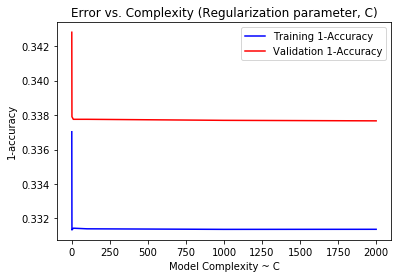

In [23]:
PlotBiasVariance(Accuracy_train_Both,Accuracy_Both,C_Both)
plt.savefig('Figures/LogReg/BaseDataset/BiasVarianceOneHotBothCoarseTunedC.png')

In [24]:
C_Both_fine=np.linspace(200,1900,10)
Accuracy_Both_fine,Accuracy_train_Both_fine,Coef_Both_fine = TuneParameters(pipeline_LogReg,C_Both_fine,X_train_OneHot_Both,Y_train,X_valid_OneHot_Both,Y_valid)
ReportBest(Accuracy_train_Both_fine,Accuracy_Both_fine,C_Both_fine,Coef_Both_fine)

/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/glinn/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/glinn/anaconda3/lib/python3.6/site-packages/sk

The best validation accuracy is 0.6623357093446419.
The best training accuracy is 0.6686656851605882.
The best value for C is 200.0
And, the best model coefficients are [[-2.25982687e-01 -1.52676646e+01 -7.51601667e-03  5.99029982e-03
  -1.49805847e-01  3.75342925e-01 -5.98359324e-01 -3.17141273e-01
  -7.43295990e-02 -8.98507264e-01 -3.02950562e-01 -3.47029254e-01
  -1.16616042e-01  3.10139752e-02 -7.35746812e-02 -7.50018811e-01
  -4.84577832e-01 -6.30440946e-01  5.23936537e-01  4.17405786e-01
  -8.20669796e-01  1.79274173e-01 -1.10974513e+00 -6.50669236e-01
  -5.50719614e-01  5.99045462e-01 -5.79860120e-01 -1.87932096e+00
  -8.79106872e-01 -3.14804090e-01  5.12401949e-01 -1.05805396e+00
  -1.26483763e+00 -1.77175948e-01 -1.29325625e-01  8.10690149e-01
  -1.44370948e+00 -2.83418281e-01 -2.73321109e-01 -5.94583481e-01
   1.47941113e+00 -4.77689147e-01  5.88025927e-01 -1.34653767e-01
  -1.00896025e-01 -4.13423709e-01 -1.03942911e+00 -6.22815627e-01
  -8.28187246e-01  4.97201038e-01 -8.16

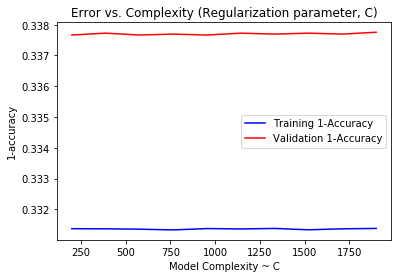

In [25]:
PlotBiasVariance(Accuracy_train_Both_fine,Accuracy_Both_fine,C_Both_fine)
plt.savefig('Figures/LogReg/BaseDataset/BiasVarianceOneHotBothFineTunedC.png')

Okay, so in the end, our best result after tuning the complexity of our model is:

In [26]:
ReportBest(Accuracy_train_Both_fine,Accuracy_Both_fine,C_Both_fine,Coef_Both_fine)

The best validation accuracy is 0.6623357093446419.
The best training accuracy is 0.6686656851605882.
The best value for C is 200.0
And, the best model coefficients are [[-2.25982687e-01 -1.52676646e+01 -7.51601667e-03  5.99029982e-03
  -1.49805847e-01  3.75342925e-01 -5.98359324e-01 -3.17141273e-01
  -7.43295990e-02 -8.98507264e-01 -3.02950562e-01 -3.47029254e-01
  -1.16616042e-01  3.10139752e-02 -7.35746812e-02 -7.50018811e-01
  -4.84577832e-01 -6.30440946e-01  5.23936537e-01  4.17405786e-01
  -8.20669796e-01  1.79274173e-01 -1.10974513e+00 -6.50669236e-01
  -5.50719614e-01  5.99045462e-01 -5.79860120e-01 -1.87932096e+00
  -8.79106872e-01 -3.14804090e-01  5.12401949e-01 -1.05805396e+00
  -1.26483763e+00 -1.77175948e-01 -1.29325625e-01  8.10690149e-01
  -1.44370948e+00 -2.83418281e-01 -2.73321109e-01 -5.94583481e-01
   1.47941113e+00 -4.77689147e-01  5.88025927e-01 -1.34653767e-01
  -1.00896025e-01 -4.13423709e-01 -1.03942911e+00 -6.22815627e-01
  -8.28187246e-01  4.97201038e-01 -8.16

We find in the end that the best dataset is one hot encoding both the main and the sub categories. Below is the report of the best overall model on the best dataset: 

In [27]:
ReportBest(Accuracy_train_Both_fine,Accuracy_Both_fine,C_Both_fine,Coef_Both_fine)

The best validation accuracy is 0.6623357093446419.
The best training accuracy is 0.6686656851605882.
The best value for C is 200.0
And, the best model coefficients are [[-2.25982687e-01 -1.52676646e+01 -7.51601667e-03  5.99029982e-03
  -1.49805847e-01  3.75342925e-01 -5.98359324e-01 -3.17141273e-01
  -7.43295990e-02 -8.98507264e-01 -3.02950562e-01 -3.47029254e-01
  -1.16616042e-01  3.10139752e-02 -7.35746812e-02 -7.50018811e-01
  -4.84577832e-01 -6.30440946e-01  5.23936537e-01  4.17405786e-01
  -8.20669796e-01  1.79274173e-01 -1.10974513e+00 -6.50669236e-01
  -5.50719614e-01  5.99045462e-01 -5.79860120e-01 -1.87932096e+00
  -8.79106872e-01 -3.14804090e-01  5.12401949e-01 -1.05805396e+00
  -1.26483763e+00 -1.77175948e-01 -1.29325625e-01  8.10690149e-01
  -1.44370948e+00 -2.83418281e-01 -2.73321109e-01 -5.94583481e-01
   1.47941113e+00 -4.77689147e-01  5.88025927e-01 -1.34653767e-01
  -1.00896025e-01 -4.13423709e-01 -1.03942911e+00 -6.22815627e-01
  -8.28187246e-01  4.97201038e-01 -8.16

In [28]:
X_valid_df=X_valid_df.drop(columns=["Unnamed: 0"])
X_valid_OneHotBoth_df = pd.get_dummies(X_valid_df,columns = ["main_category","category"])

In [29]:
print(f"The most negatively linearly correlated feature is {X_valid_OneHotBoth_df.columns[np.argmin(Coef_Both_fine)]}.")
print(f"The most positively linearly correlated feature is {X_valid_OneHotBoth_df.columns[np.argmax(Coef_Both_fine)]}.")

The most negatively linearly correlated feature is usd_goal_real.
The most positively linearly correlated feature is category_21.
